# 1.  Import the necessary Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import pandas_profiling
import seaborn as sns
from scipy import stats

# 2. Read the necessary datasets for the Capstone Project

In [5]:
#  Import the of dataset
training_set = pd.read_csv('C:/Users/chadc/Downloads/DATA SCIENCE MAIN COURSE/Capstone Project/train.csv')
training_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3.  Create copies of the original dataframes in case the original data needs to be preserved before manipulation

In [6]:
df = training_set.copy(deep=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 4.  Check the info(), describe(), shape, and columns of the dataframes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.shape

(1460, 81)

In [76]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# 5.  Create a subset of the data that contains NULL values

In [11]:
df_null_values = df.isnull()

# 6.  Find the percentage of null values per column in the DataFrame

In [12]:
df_avg = round(df_null_values.mean()[df_null_values.mean() > 0].sort_values(ascending=False),4) * 100
df_avg

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

# 6.  Find the count of the null values per column

In [13]:
df_count_null = df_null_values.sum()[df_null_values.sum() > 0].sort_values(ascending=False)
df_count_null

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

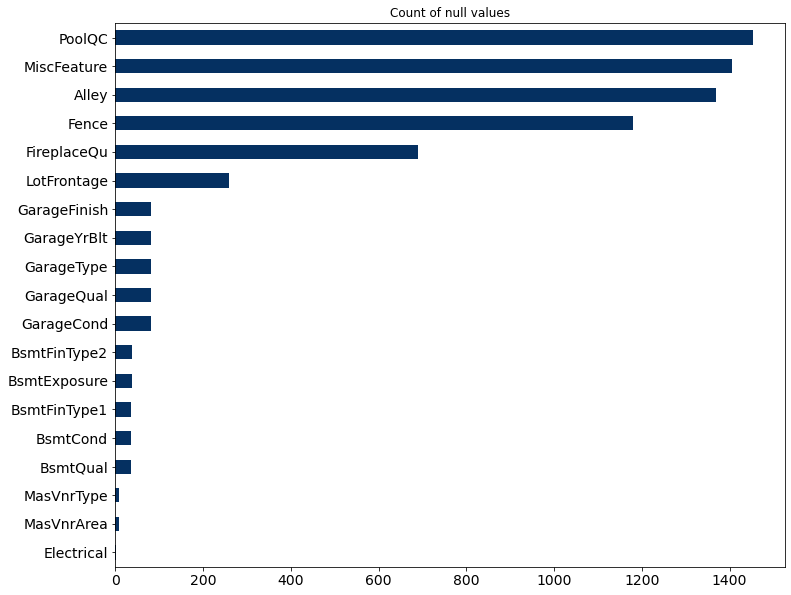

In [14]:
df_count_null.sort_values(ascending=True).plot(
    kind='barh', figsize=(12,10), fontsize=14, colormap="RdBu_r", title="Count of null values"
)


# 7.  Assess the missing values with a missingness bar plot and also a missingness matrix

In [15]:
first_qt = df.iloc[:,:20]
second_qt = df.iloc[:,20:40]
third_qt = df.iloc[:,40:60]
fourth_qt = df.iloc[:,60:81]

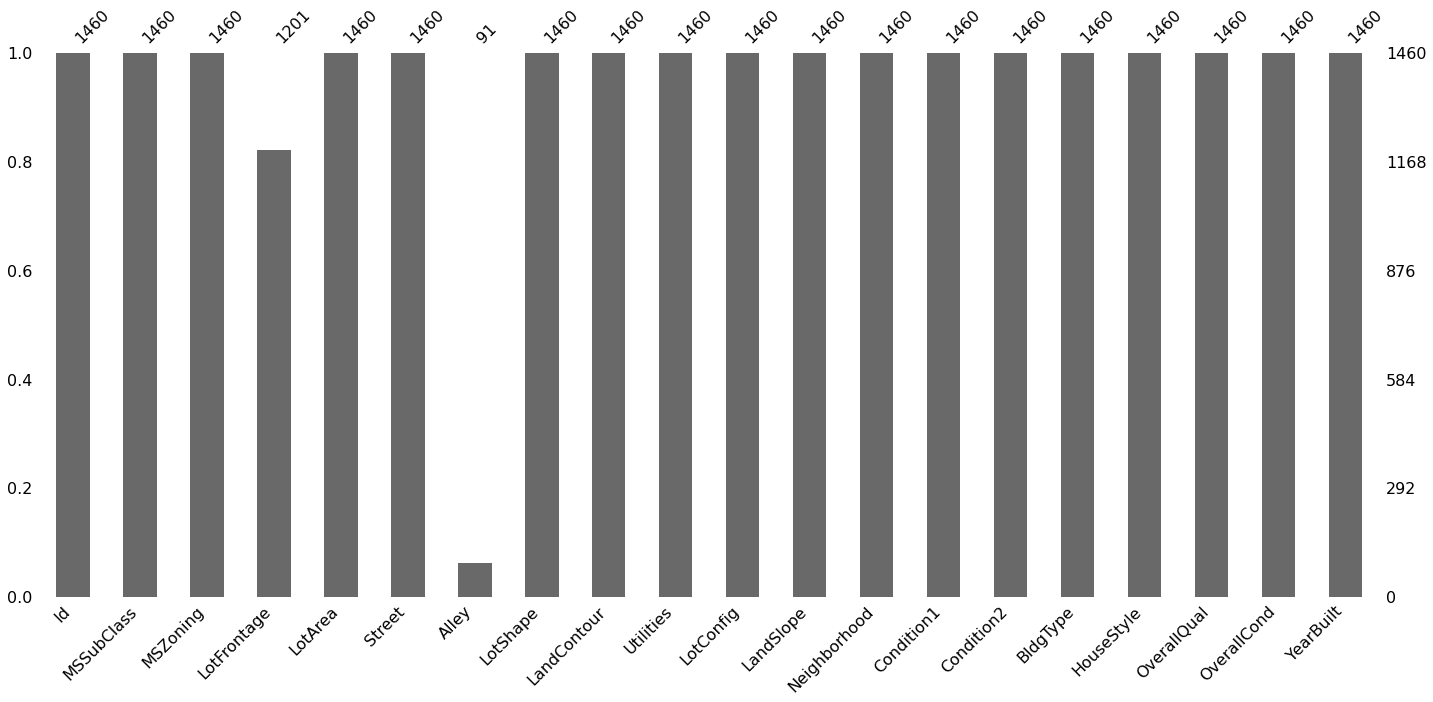

In [16]:
msno.bar(first_qt)

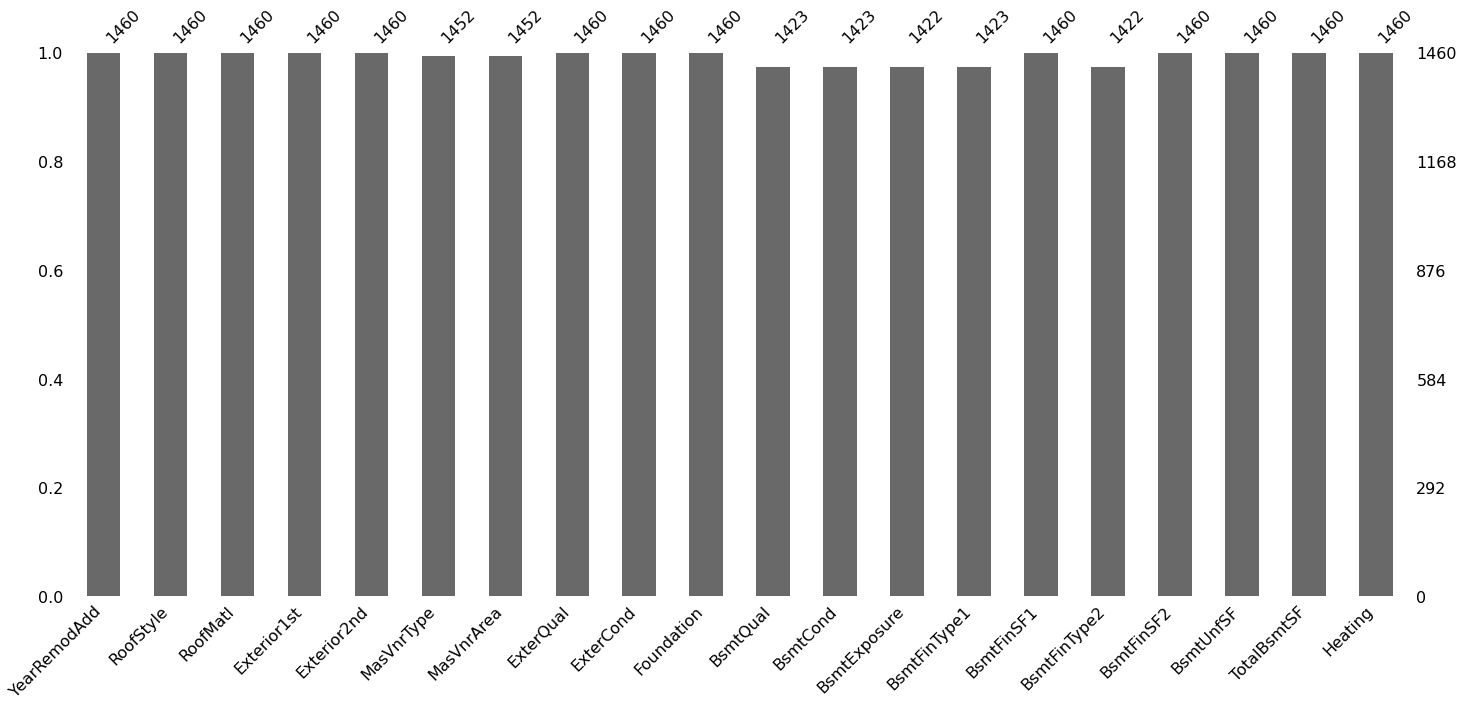

In [17]:
msno.bar(second_qt)

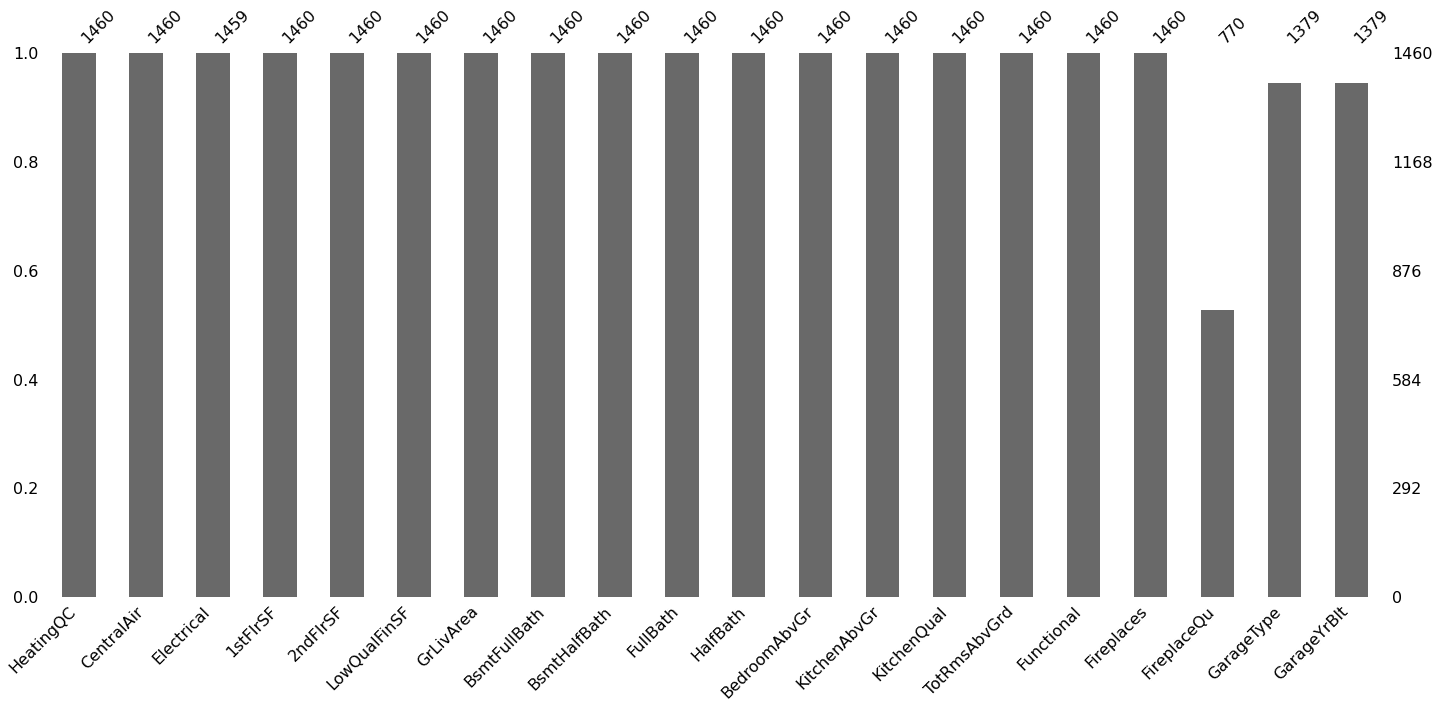

In [18]:
msno.bar(third_qt)

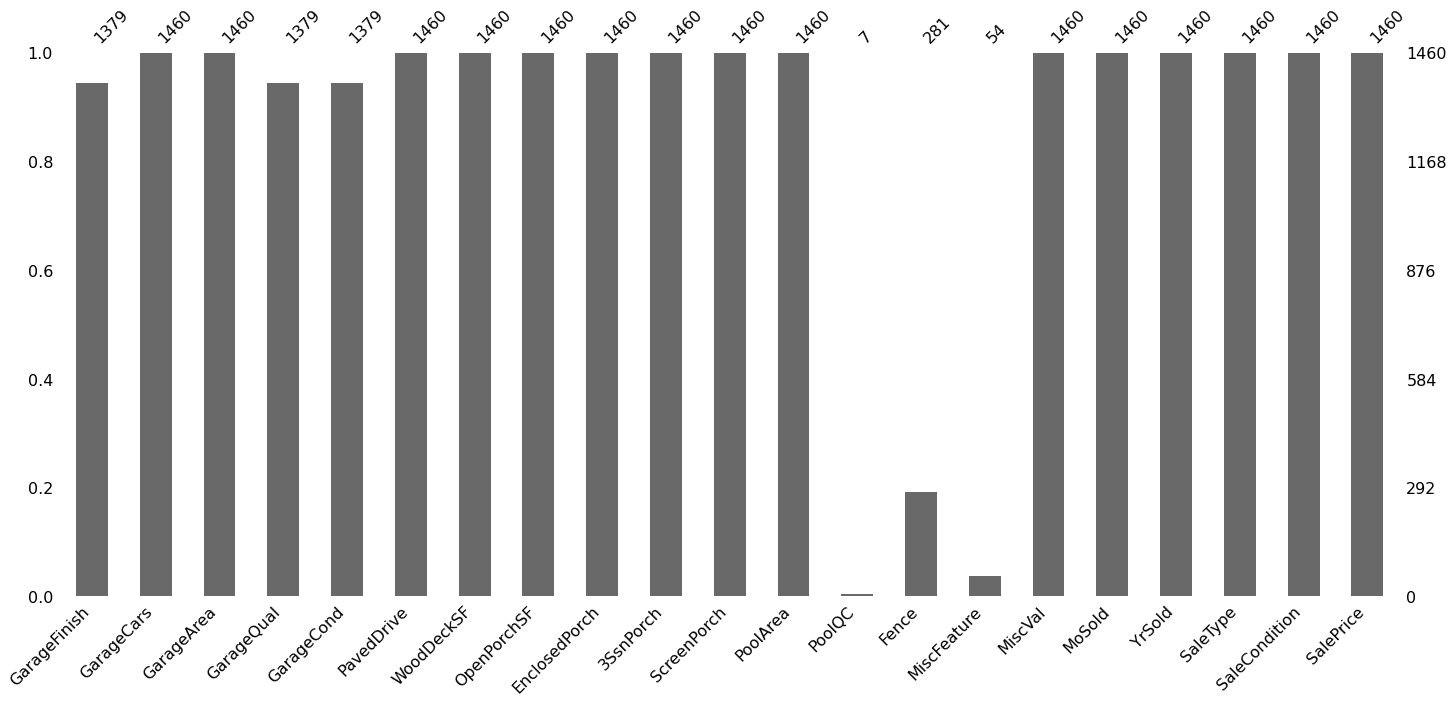

In [19]:
msno.bar(fourth_qt)

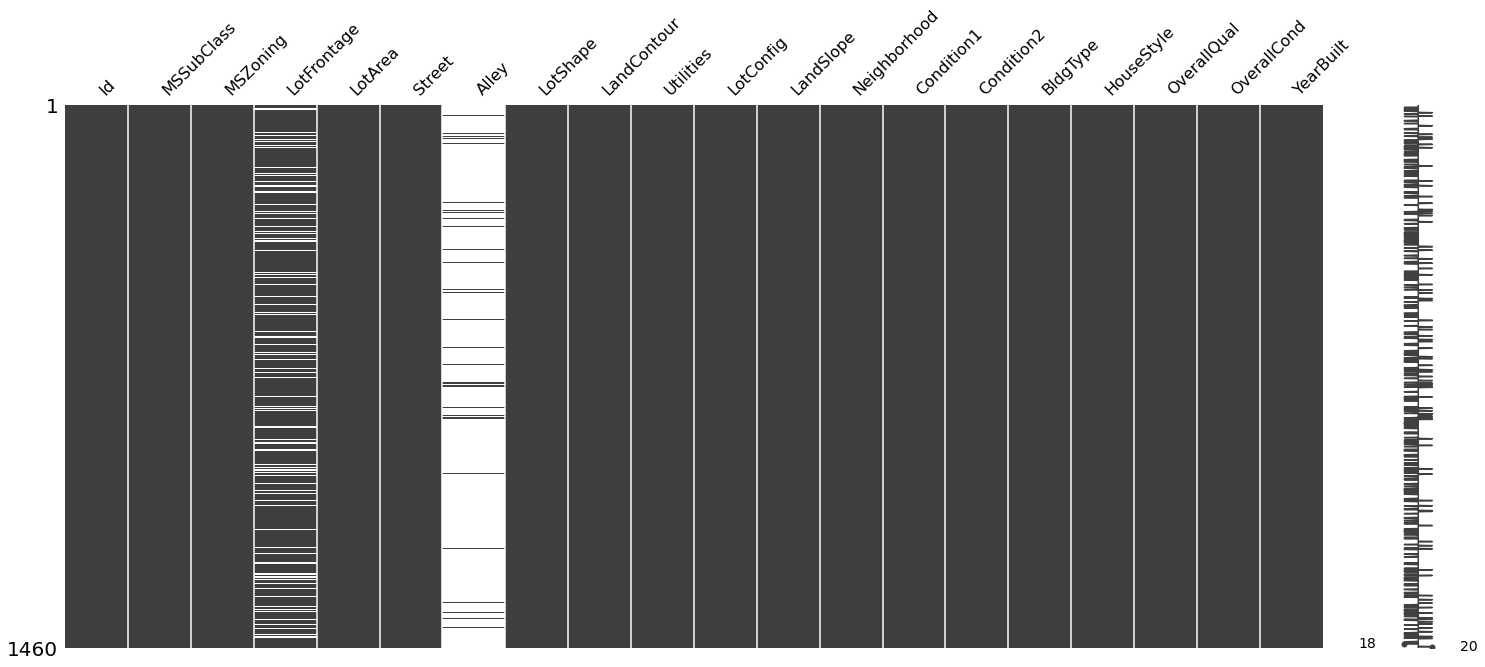

In [20]:
msno.matrix(first_qt)

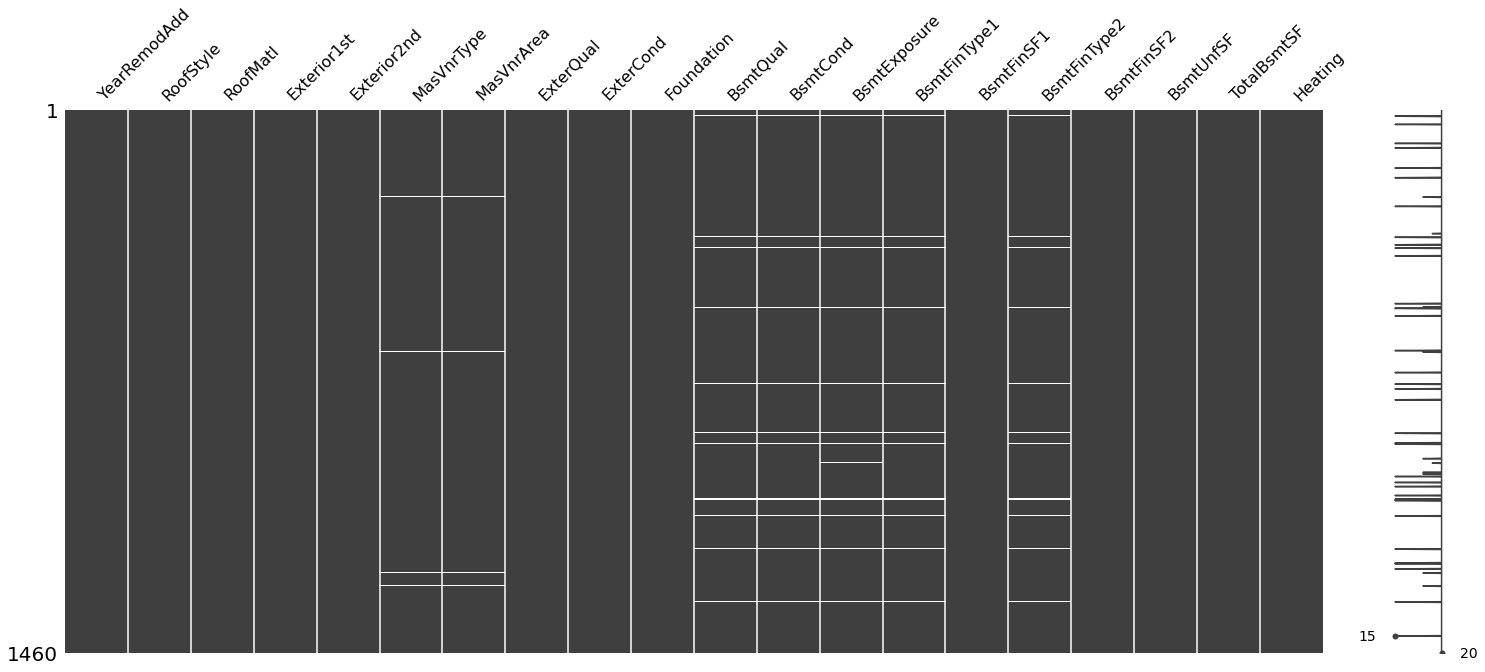

In [21]:
msno.matrix(second_qt)

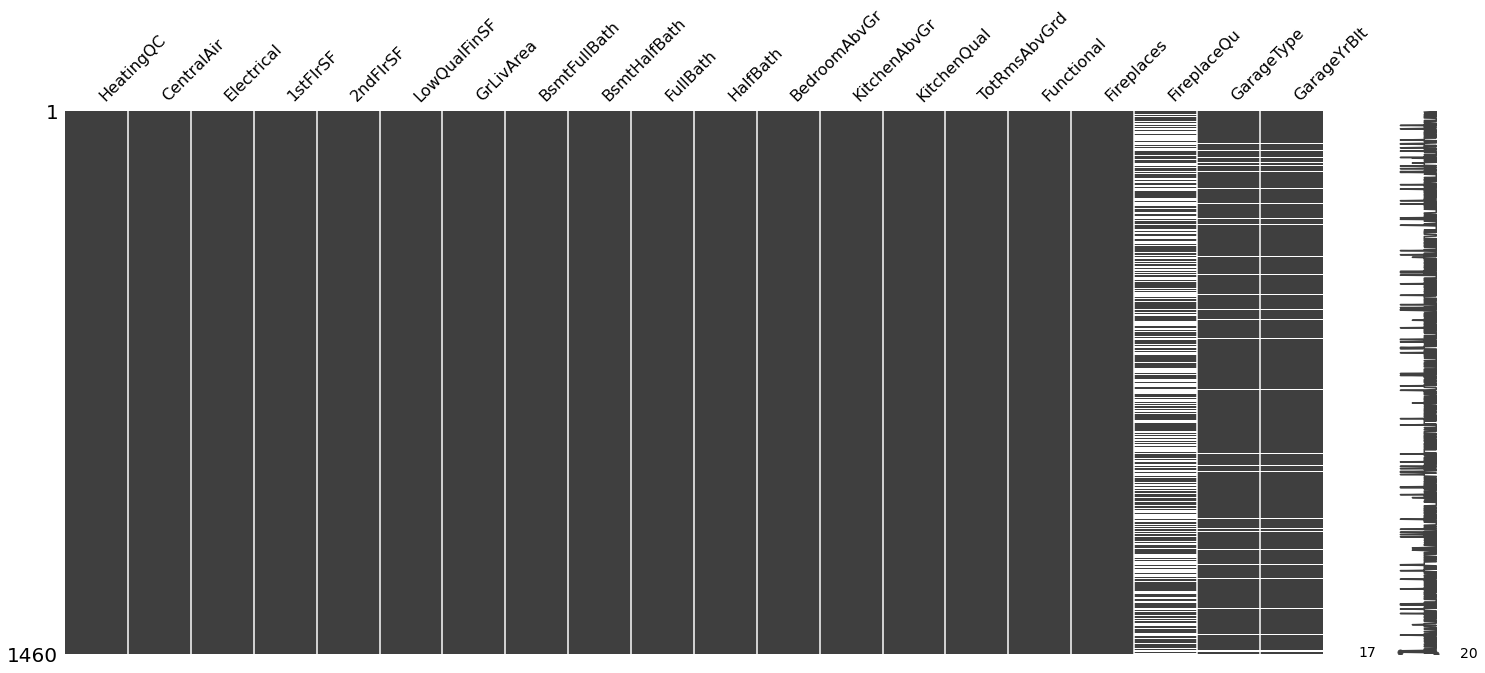

In [22]:
msno.matrix(third_qt)

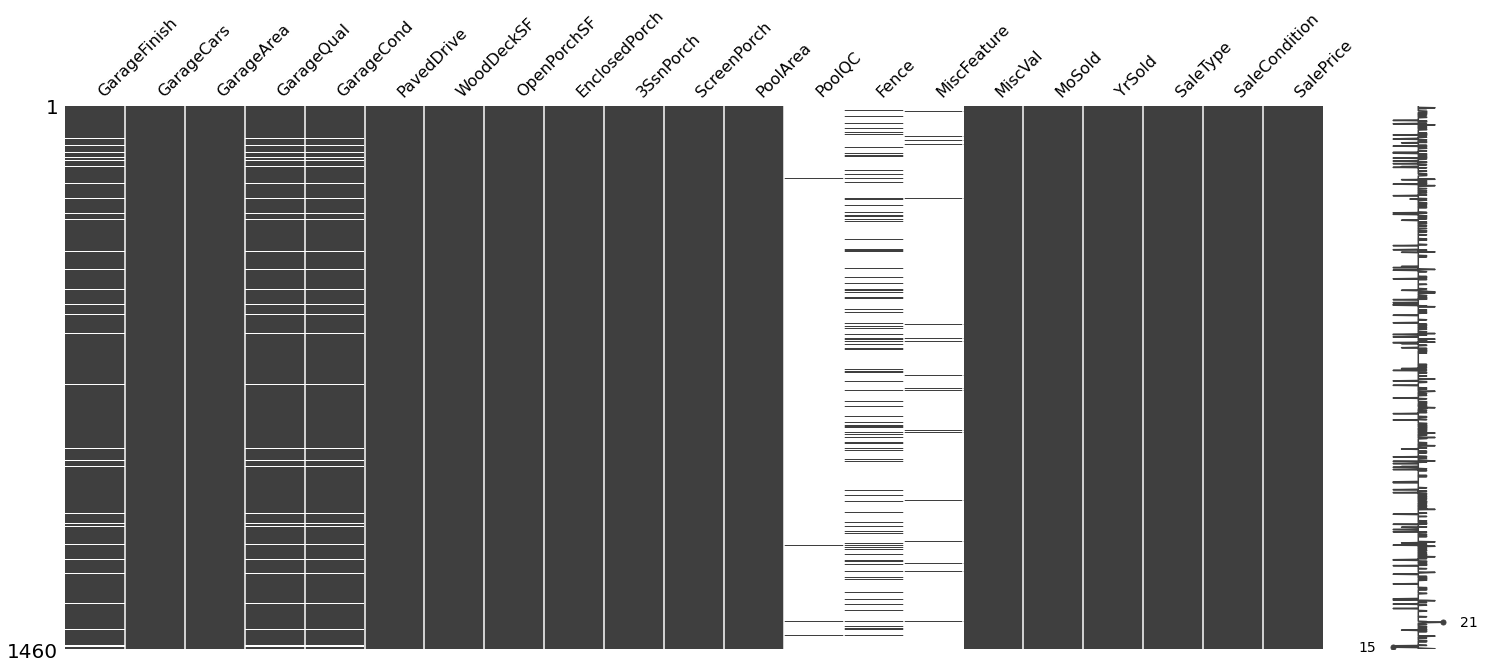

In [23]:
msno.matrix(fourth_qt)

In [24]:
##Since 99.52% of the Pool Quality ('PoolQC') column seems to contain missing values.  Out of 1460 possible values for this
##column, only 7 values are available.  Therefore, it seems logical that this column gets dropped entirely. Also, the 'ID'
##column does not seem to serve a purpose, so this column will be dropped as well

In [25]:
df.drop(columns=['Id', 'PoolQC'], inplace=True)

In [26]:
## In the legend, it indicates that if a house does not have certain features, then the designation 'NA' is used.  Therefore,
## instead of using 'NA', a fill method of 'None' will suffice to account for the missing values of these columns

In [27]:
df['GarageType'].fillna('None', inplace=True) # Description states that NA means that there is No Garage
df['GarageFinish'].fillna('None', inplace=True) # Description states that NA means that there is No Garage
df['GarageQual'].fillna('None', inplace=True) # Description states that NA means that there is No Garage
df['GarageCond'].fillna('None', inplace=True) # Description states that NA means that there is No Garage
df['BsmtFinType1'].fillna('None', inplace=True) # Description states that NA means that there is No Basement
df['BsmtQual'].fillna('None', inplace=True) # Description states that NA means that there is No Garage
df['BsmtCond'].fillna('None', inplace=True) # Description states that NA means that there is No Garage
df['BsmtExposure'].fillna('None', inplace=True) # Description states that NA means that there is No Garage
df['BsmtFinType2'].fillna('None', inplace=True) # Description states that NA means that there is No Garage
df['Alley'].fillna('None', inplace=True) # Description states that NA means that there is No Alley Access
df['Fence'].fillna('None', inplace=True) # Description states that NA means that there is No Fence
df['FireplaceQu'].fillna('None', inplace=True) # Description states that NA means that there is No Fireplace
df['MasVnrType'].fillna('None', inplace=True) # Description states that None means that there is No Masonry Veneer
df['MiscFeature'].fillna('None', inplace=True) # Description states that None means that there is No Miscellaneous Features


In [28]:
df.isna().sum()[df.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [29]:
# For the 'GarageYrBlt', 'MasVnrArea', and 'LotFrontage' columns, 
# the proper method to fill these missing values is with 0 as for
# 'GarageYrBlt' if the value is 'NaN' that is because the property
# does not have a garage, mason veneer area, or lot frontage

In [30]:
df['GarageYrBlt'] = df.fillna(0)
df['MasVnrArea'] = df.fillna(0)


In [31]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage    259
Electrical       1
dtype: int64

In [32]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

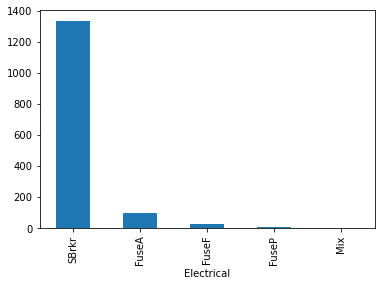

In [33]:
df.groupby(['Electrical'])['Electrical'].count().sort_values(ascending=False).plot.bar()

In [34]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [35]:
df['Electrical'] = df.fillna('SBrkr')

In [45]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

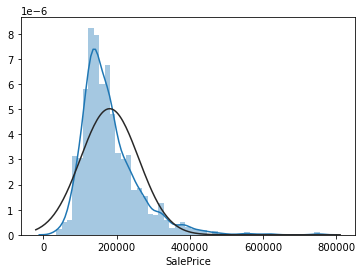

In [48]:
sns.distplot(df['SalePrice'], fit=stats.norm)
plt.show()

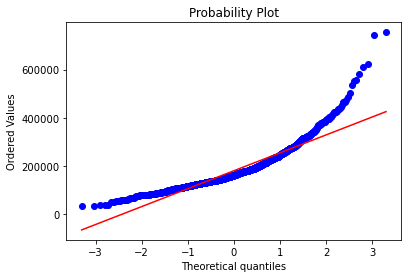

In [50]:
stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [51]:
print('SalePrice Skewness: ', df['SalePrice'].skew())
print('SalePrice Kurtosis: ', df['SalePrice'].kurt())

SalePrice Skewness:  1.8828757597682129
SalePrice Kurtosis:  6.536281860064529


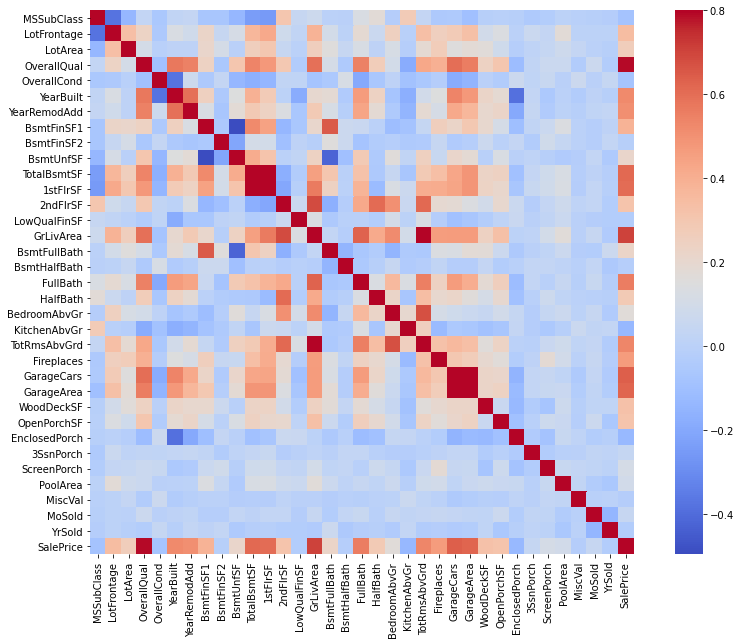

In [40]:
corrmat = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat, cmap = 'coolwarm', vmax=.8, square=True)
plt.show()

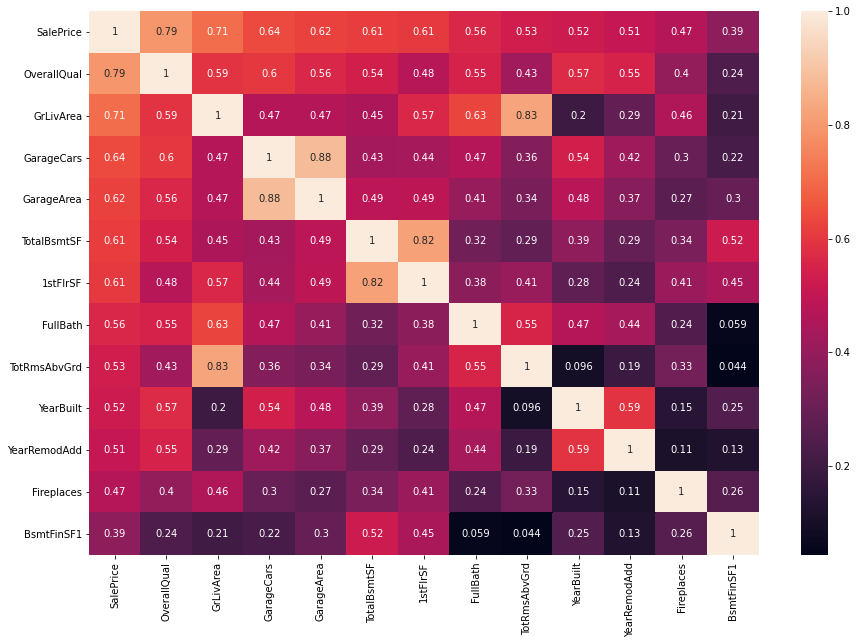

In [43]:
feats = corrmat.nlargest(13, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[feats].values.T)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, yticklabels=feats.values, xticklabels=feats.values)
plt.show()

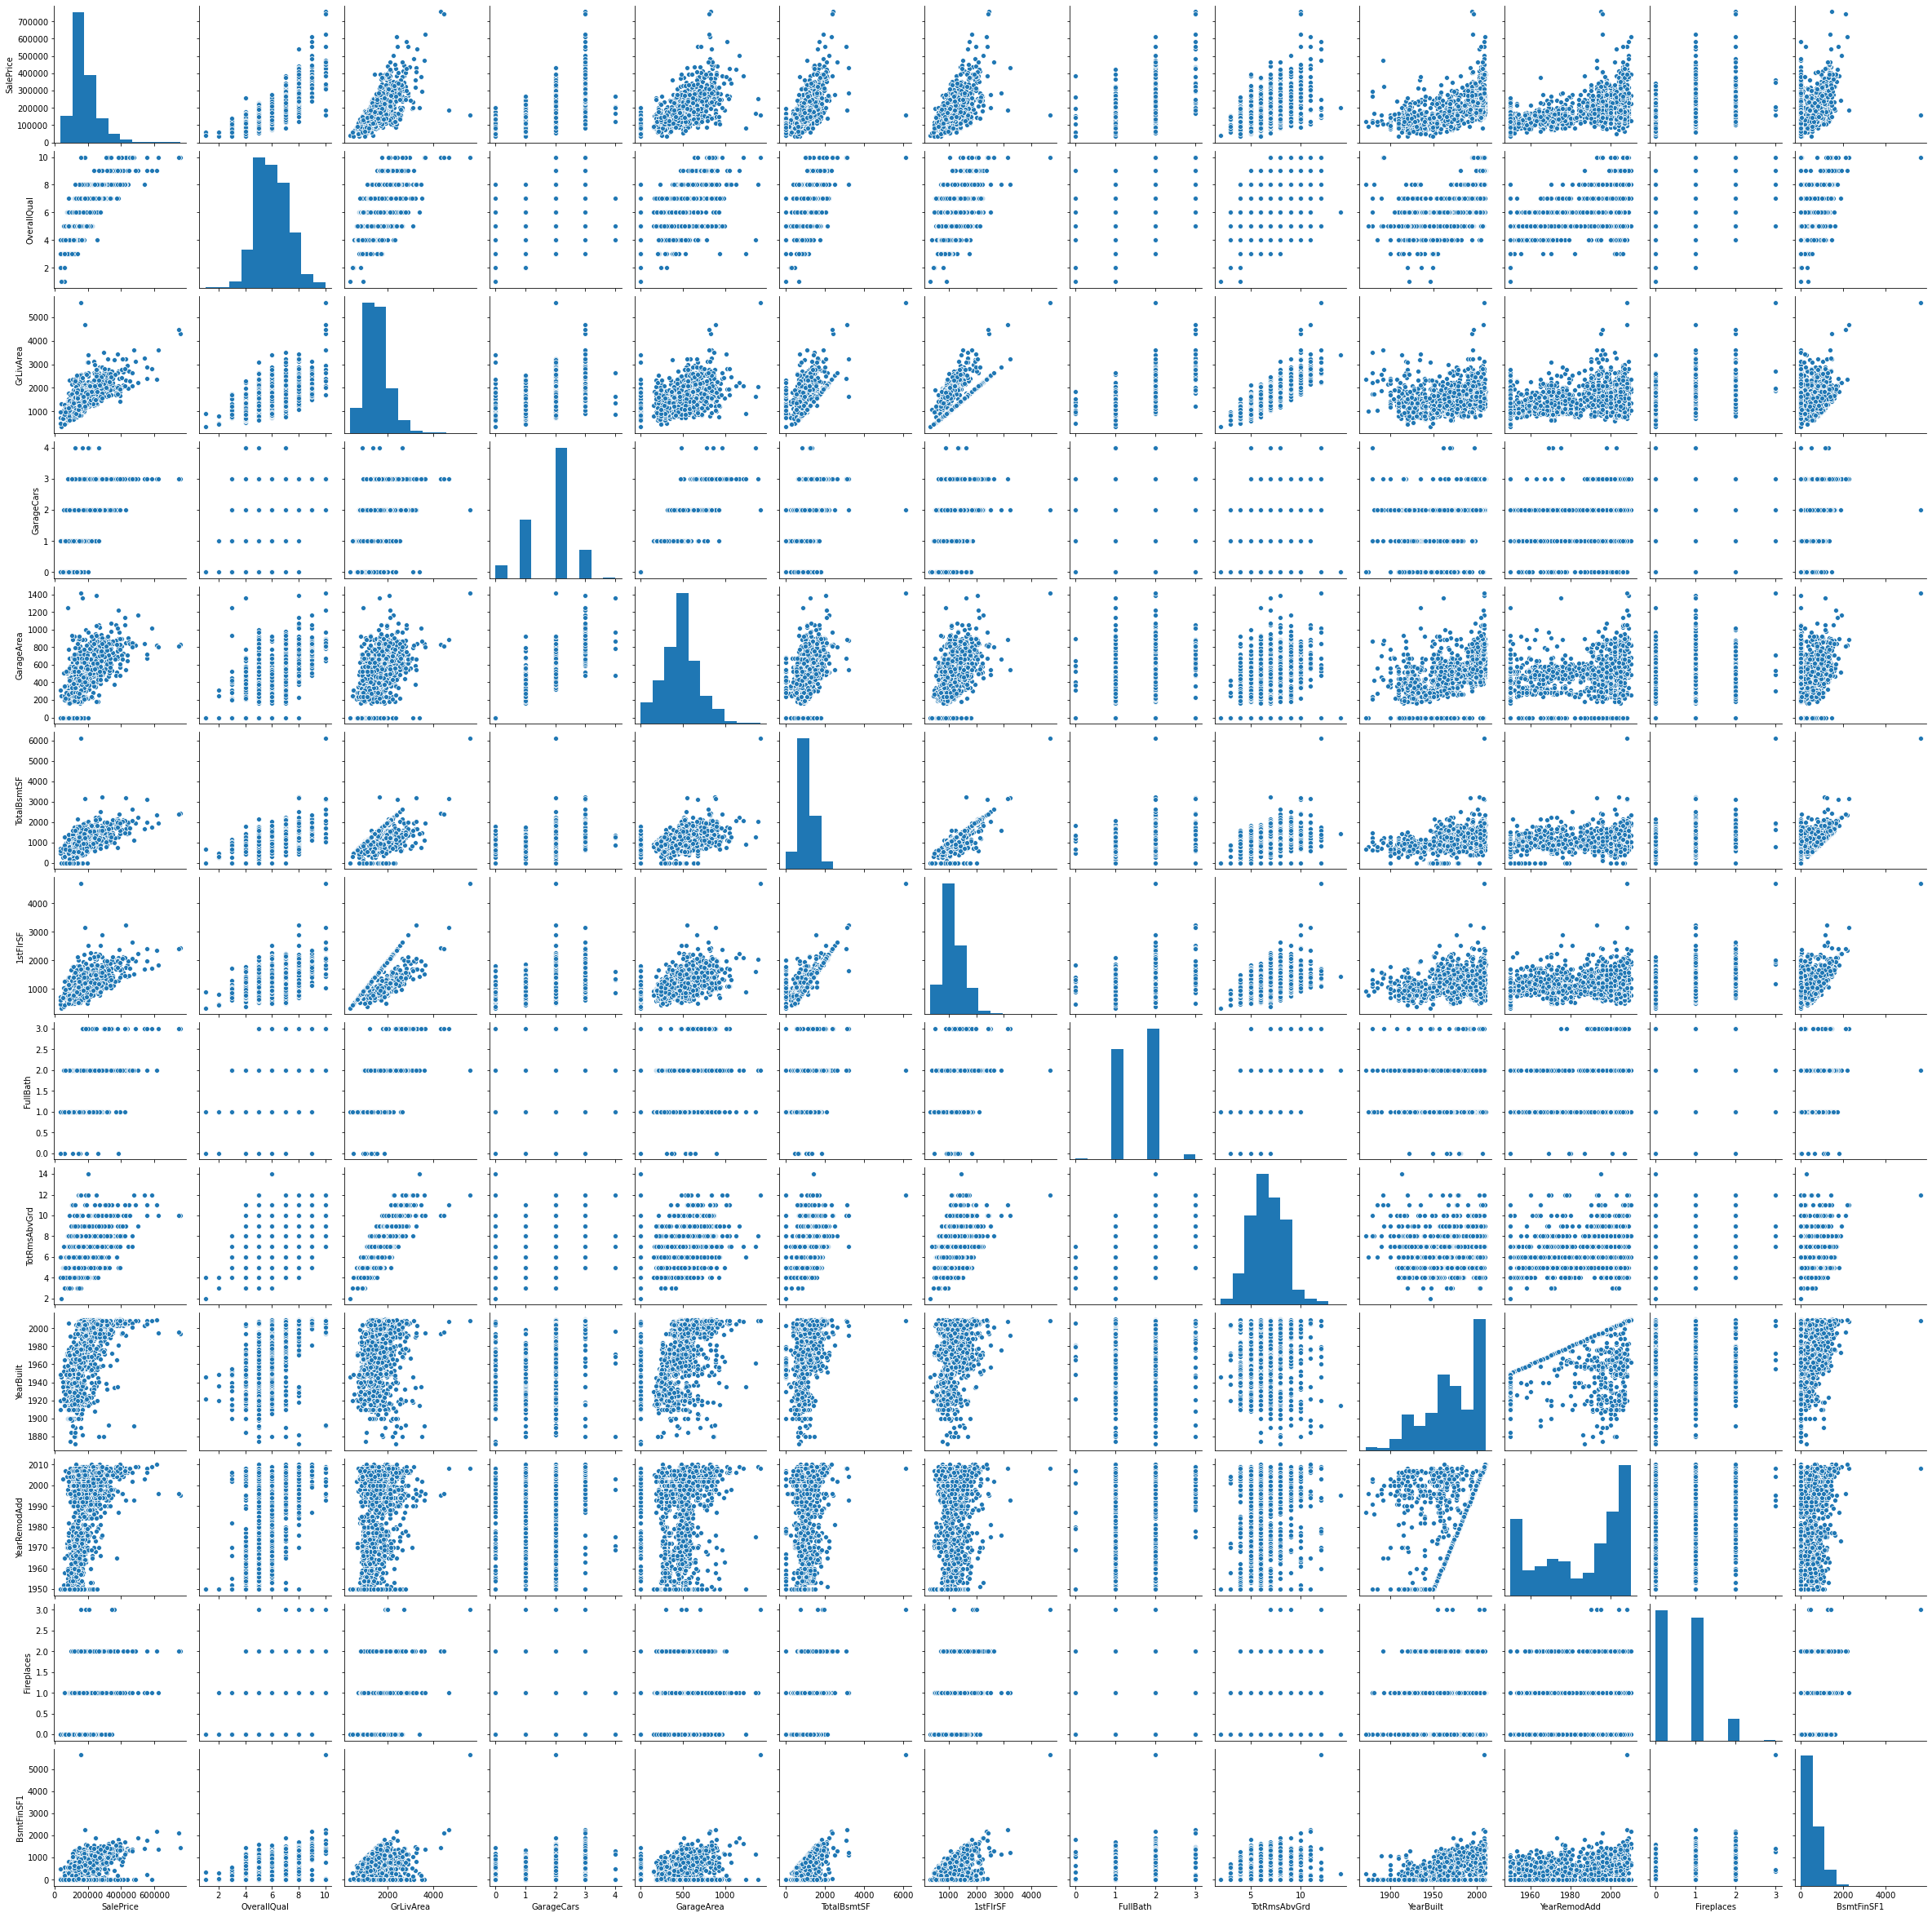

In [44]:
sns.pairplot(df[feats])
plt.show()